## Data Generation

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Génération des données avec make_classification
X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=3,  # Augmenté à 3
    n_classes=3,
    n_clusters_per_class=2,
    class_sep=2,
    random_state=42
)


# Afficher les dimensions de X et y
print(X.shape, y.shape)


(10000, 20) (10000,)


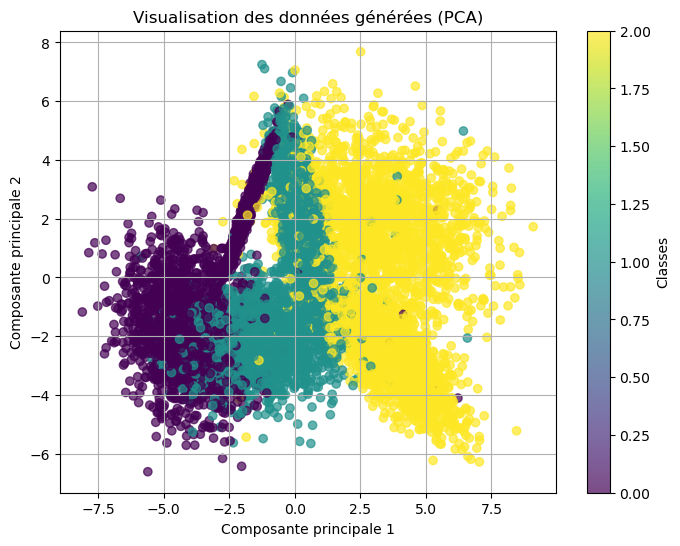

In [3]:
# Réduction de la dimension à 2 composantes
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualisation des données dans l'espace 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Classes')
plt.title("Visualisation des données générées (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Division initiale : 70% entraînement et 30% temporaire (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Division secondaire : 20% test et 10% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

print(f"Dimensions - Entraînement : {X_train.shape}, Test : {X_test.shape}, Validation : {X_val.shape}")


Dimensions - Entraînement : (7000, 20), Test : (2001, 20), Validation : (999, 20)


## Classification

### Training the model

In [5]:
from sklearn.tree import DecisionTreeClassifier

# créer le modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# faire des prédictions sur les données de test
y_test_pred = model.predict(X_test)

### Testing the model

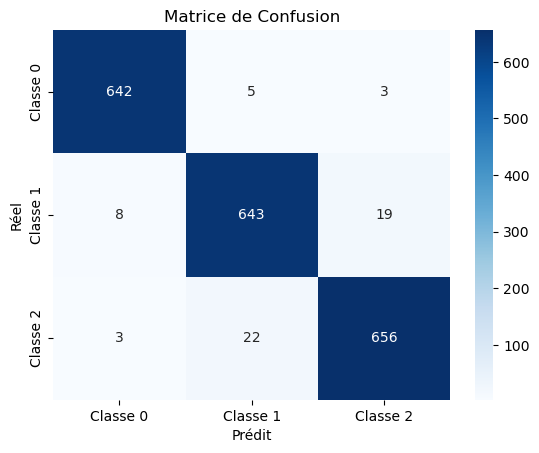

Précision (Macro): 0.97
Rappel (Macro): 0.97
F1-Score (Macro): 0.97
Exactitude: 0.97
Précision (Pondérée): 0.97
Rappel (Pondéré): 0.97
F1-Score (Pondéré): 0.97
Précision (Micro): 0.97
Rappel (Micro): 0.97
F1-Score (Micro): 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       650
           1       0.96      0.96      0.96       670
           2       0.97      0.96      0.97       681

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Faire des prédictions sur les données de test
y_test_pred = model.predict(X_test)

# Calculer de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calcul des métriques
precision_macro = precision_score(y_test, y_test_pred, average='macro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')
f1_macro = f1_score(y_test, y_test_pred, average='macro')
accuracy = accuracy_score(y_test, y_test_pred)

precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
f1_weighted = f1_score(y_test, y_test_pred, average='weighted')

# Afficher la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title('Matrice de Confusion')
plt.ylabel('Réel')
plt.xlabel('Prédit')
plt.show()

# Afficher les autres métriques pour chaque type de moyenne
print(f"Précision (Macro): {precision_macro:.2f}")
print(f"Rappel (Macro): {recall_macro:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")
print(f"Exactitude: {accuracy:.2f}")
print(f"Précision (Pondérée): {precision_weighted:.2f}")
print(f"Rappel (Pondéré): {recall_weighted:.2f}")
print(f"F1-Score (Pondéré): {f1_weighted:.2f}")

# Calculer la moyenne micro
precision_micro = precision_score(y_test, y_test_pred, average='micro')
recall_micro = recall_score(y_test, y_test_pred, average='micro')
f1_micro = f1_score(y_test, y_test_pred, average='micro')

print(f"Précision (Micro): {precision_micro:.2f}")
print(f"Rappel (Micro): {recall_micro:.2f}")
print(f"F1-Score (Micro): {f1_micro:.2f}")


# Afficher le rapport de classification
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)


## Exporting the model and the validation data

In [ ]:
import joblib

joblib.dump(model, 'model.joblib')

# Exporter le modèle
joblib.dump(model, 'model.joblib')

# Exporter les données de validation
joblib.dump((X_val, y_val), 'validation_data.joblib')